# Pymaceuticals Inc.
---

### Analysis

- In this analysis of tumor data in mice, you can see the comparison of the final tumor volume results and the following four drugs: Capomulin, Ramicane, Infubinol, and Ceftamin.

- Of the four, Capomulin and Ramicane resulted in the smallest final tumor sizes as well as similar outcomes. You can also see how Infubinol had an outlier where the final tumor volume was comparable to Capomulin and Ramicane, the rest of its final tumor volumes were significantly higher and were comparable to those of Ceftamin. Of the four drugs, Capomulin and Ramicane were the most successful at reducing the tumor size in mice.

- When observing the drug Capomulin, a strong positive correlation betweeen final tumor volume and mouse weight is shown. The more the mouse weighs, the greater the final tumor size will be with a correlation coefficient of 0.84 and an r-squared value of 0.71.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"]).sort_values(["Timepoint", "Metastatic Sites"], ascending=[True, True])
mapper = {old_index: new_index for new_index, old_index in enumerate(mouse_study_combined_df.index)}
mouse_study_combined_df = mouse_study_combined_df.rename(index=mapper)

# Display the data table for preview
mouse_study_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(mouse_study_combined_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateIDs = mouse_study_combined_df[mouse_study_combined_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicateIDs

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatesDF = mouse_study_combined_df[mouse_study_combined_df["Mouse ID"] == duplicateIDs[0]]
duplicatesDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
108,g989,0,45.000000,0,Propriva,Female,21,26
327,g989,5,48.786801,0,Propriva,Female,21,26
328,g989,5,47.570392,0,Propriva,Female,21,26
542,g989,10,51.745156,0,Propriva,Female,21,26
543,g989,10,49.880528,0,Propriva,Female,21,26
751,g989,15,53.442020,0,Propriva,Female,21,26
835,g989,15,51.325852,1,Propriva,Female,21,26
1016,g989,20,55.326122,1,Propriva,Female,21,26
1017,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_combined_df.drop_duplicates(subset="Mouse ID")
clean_df = clean_df[clean_df["Mouse ID"] != duplicateIDs[0]]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_length = len(clean_df["Mouse ID"])
clean_df_length

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# reate a new dataframe by deleting the mouse IDs that that have duplicates from the main dataframe
clean_df_init = mouse_study_combined_df[mouse_study_combined_df["Mouse ID"] != duplicateIDs[0]]
clean_df_init

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,t718,45,63.423695,4,Placebo,Female,10,30
1889,y769,45,68.594745,4,Ceftamin,Female,6,27
1890,t198,45,64.911363,4,Propriva,Male,22,26
1891,v991,45,70.167749,4,Propriva,Female,10,30


In [16]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean of the tumor volume. 
Drug_Regimen_means = clean_df_init.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Drug_Regimen_means

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# median
Drug_Regimen_medians = clean_df_init.sort_values("Tumor Volume (mm3)").groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Drug_Regimen_medians

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# variance
Drug_Regimen_var = clean_df_init.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Drug_Regimen_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# standard deviation
Drug_Regimen_std = clean_df_init.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Drug_Regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# SEM
from scipy.stats import sem
Drug_Regimen_sem = clean_df_init.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
Drug_Regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# Assemble into a single summary DataFrame.
summary_stat_table = pd.DataFrame({"Mean Tumor Volume":Drug_Regimen_means,
                                   "Median Tumor Volume":Drug_Regimen_medians,
                                   "Tumor Volume Variance": Drug_Regimen_var,                                   
                                   "Tumor Volume Std. Dev.": Drug_Regimen_std,                                   
                                   "Tumor Volume Std. Err.": Drug_Regimen_sem                                   
})
summary_stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df_init.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

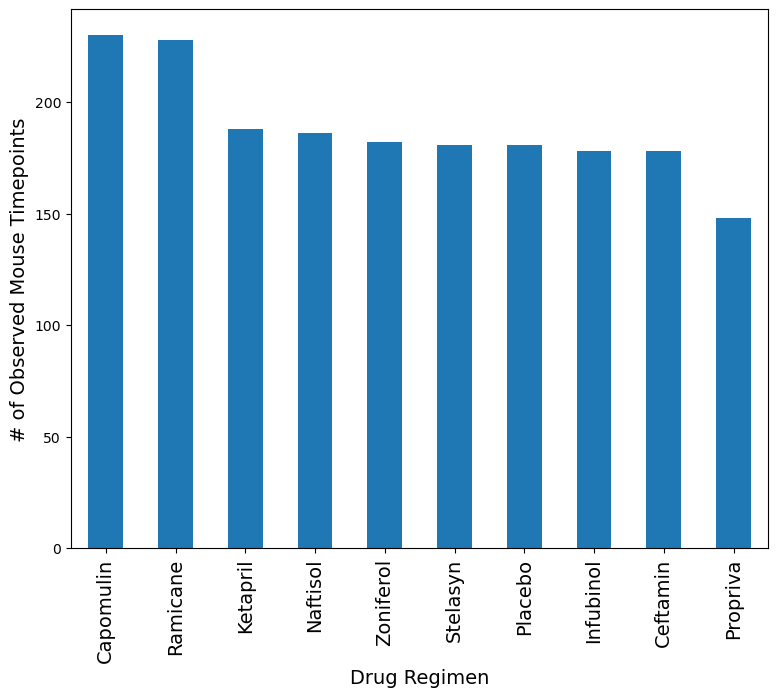

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# First compute the value_counts() for each drug regimen
Drug_Regimen_counts = clean_df_init["Drug Regimen"].value_counts()
# Now Plot the bar chart using pandas
fig_pandas = Drug_Regimen_counts.plot(kind="bar", figsize=(9,7))
fig_pandas.set_xlabel("Drug Regimen", fontsize=14)
fig_pandas.set_ylabel("# of Observed Mouse Timepoints", fontsize=14)
xticklabels = Drug_Regimen_counts.index
# plt.yticks(fontsize = 14) 
# yticklabels = Drug_Regimen_counts.values
fig_pandas.set_xticklabels(xticklabels, rotation=90, fontsize=14)
plt.show()

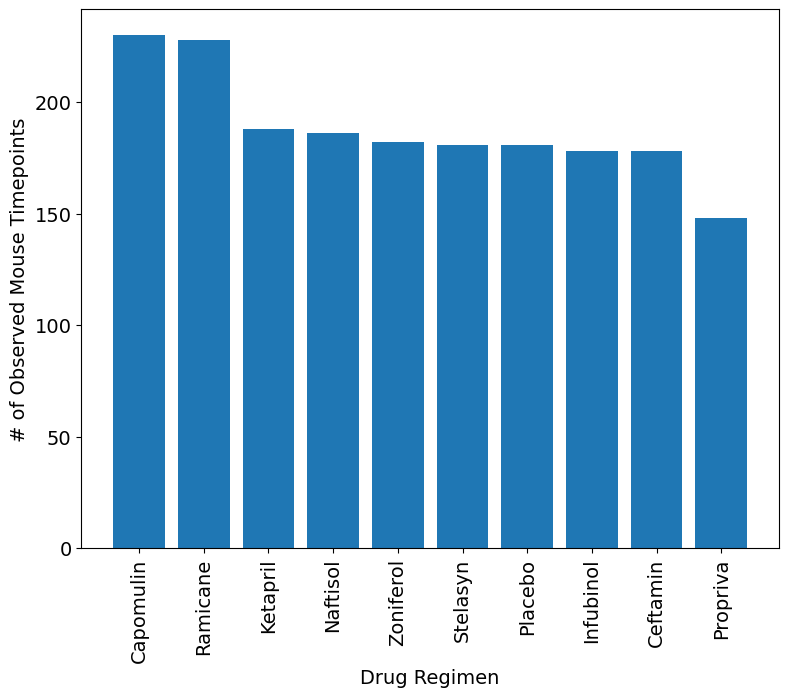

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(9,7))
plt.bar(Drug_Regimen_counts.index, Drug_Regimen_counts.values, color="tab:blue", align="center")
plt.xticks(rotation="vertical", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=14)
plt.show()

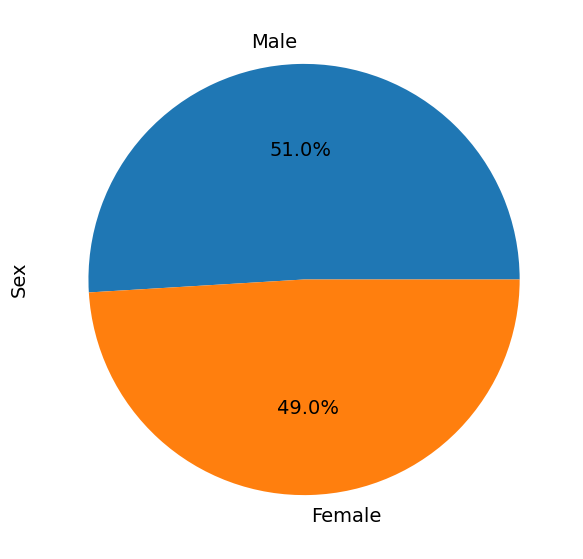

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_counts = clean_df_init["Sex"].value_counts()
fig_pie_pandas = mouse_sex_counts.plot(kind="pie", autopct="%1.1f%%", fontsize=14, figsize=(9,7)) 
fig_pie_pandas.set_ylabel("Sex", fontsize=14)
plt.show()

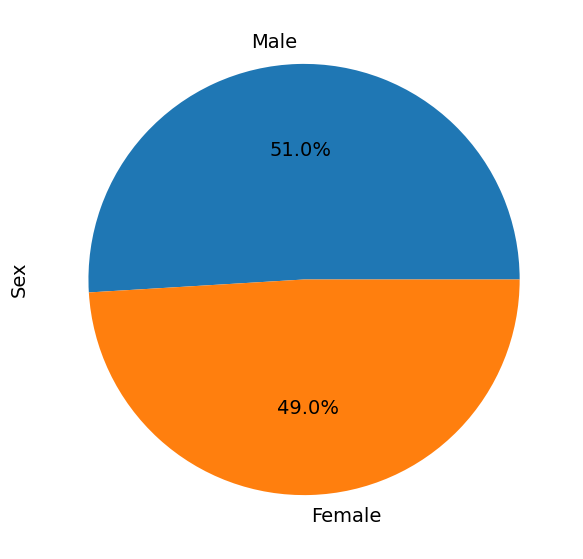

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(9,7))
plt.pie(mouse_sex_counts.values, labels=mouse_sex_counts.index, autopct="%1.1f%%", textprops={'fontsize': 14})
plt.ylabel("Sex", fontsize = 14)
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(clean_df_init.groupby(["Mouse ID"])["Timepoint"].max())
last_timepoint_df = last_timepoint_df.reset_index()
last_timepoint_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [29]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp_and_clean_df = pd.merge(last_timepoint_df, clean_df_init, how = 'left', on = ['Mouse ID','Timepoint'])
last_tp_and_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatment_list:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_specific_df = last_tp_and_clean_df[last_tp_and_clean_df["Drug Regimen"] == treatment]
    treatment_specific_vol = treatment_specific_df["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(treatment_specific_vol)
    
    # Determine outliers using upper and lower bounds
    t_quartiles = treatment_specific_vol.quantile([0.25, 0.5, 0.75])
    lowerQ = t_quartiles[0.25]
    upperQ = t_quartiles[0.75]
    IQR = upperQ - lowerQ
    Lower_bound = lowerQ - (1.5*IQR)
    Upper_bound = upperQ + (1.5*IQR)
    Outliers = treatment_specific_vol.loc[lambda x: (x < Lower_bound) | (x > Upper_bound)]
    print(f"{treatment}'s potential outliers: {Outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


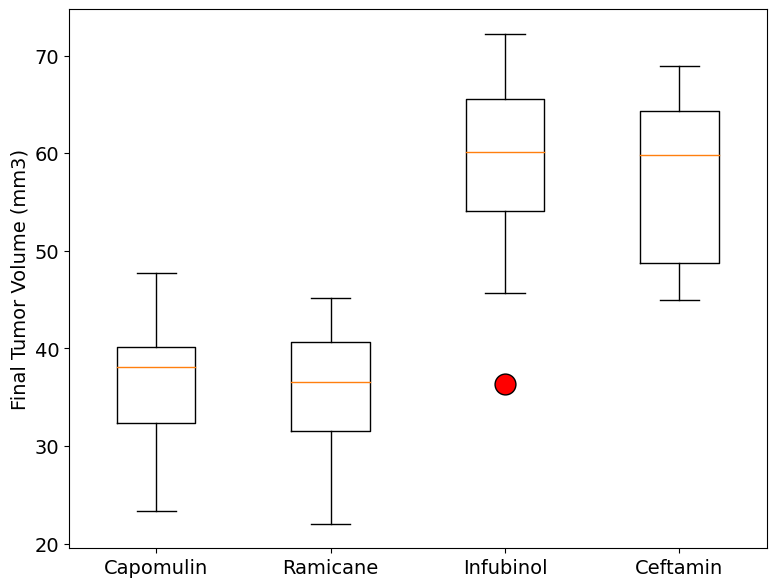

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import numpy as np
plt.figure(figsize=(9,7))
plt.boxplot(tumor_vol_list, labels = treatment_list, 
            flierprops={'marker': 'o', 'markersize': 15, 'markerfacecolor': 'red'})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Final Tumor Volume (mm3)', fontsize = 14)
plt.show()

## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_regimen_df = clean_df_init[clean_df_init["Drug Regimen"] == "Capomulin"] #.copy()
Capomulin_regimen_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1833,y793,45,31.896238,2,Capomulin,Male,17,17
1834,g316,45,40.159220,2,Capomulin,Female,22,22
1861,r554,45,32.377357,3,Capomulin,Female,8,17
1862,l509,45,41.483008,3,Capomulin,Male,17,21


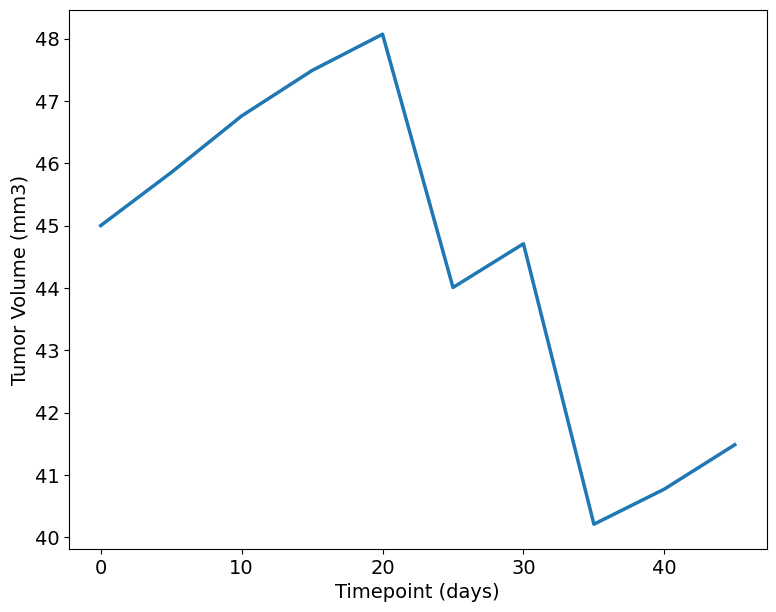

In [33]:
I509_Capomulin_df = Capomulin_regimen_df.loc[Capomulin_regimen_df["Mouse ID"] == "l509",:]
plt.figure(figsize=(9,7))
plt.plot(I509_Capomulin_df["Timepoint"], I509_Capomulin_df["Tumor Volume (mm3)"], linewidth = 2.5)
plt.xlabel('Timepoint (days)', fontsize = 14)
plt.ylabel('Tumor Volume (mm3)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

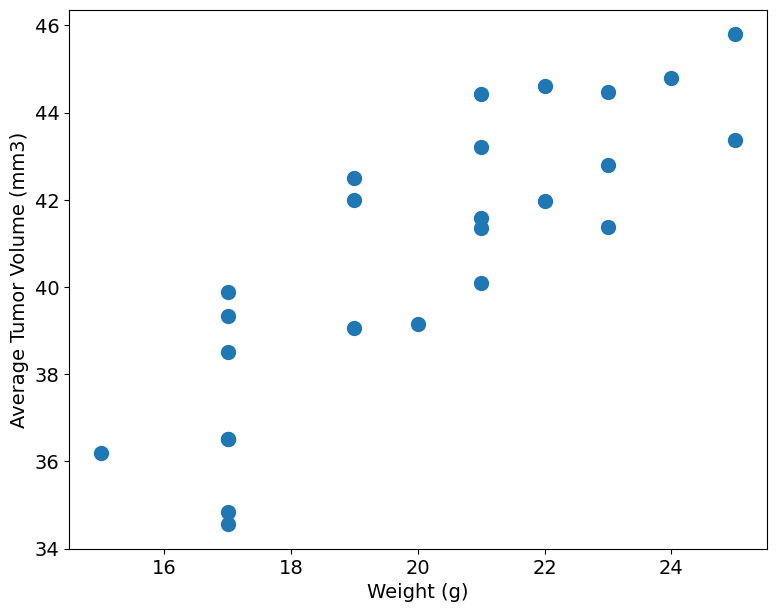

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_avg_tum_vol = Capomulin_regimen_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
Capomulin_mouse_weight = Capomulin_regimen_df.groupby(["Mouse ID"])["Weight (g)"].first()
plt.figure(figsize=(9,7))
plt.scatter(Capomulin_mouse_weight,Capomulin_avg_tum_vol, s = 100)
plt.xlabel('Weight (g)', fontsize = 14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(Capomulin_avg_tum_vol, Capomulin_mouse_weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


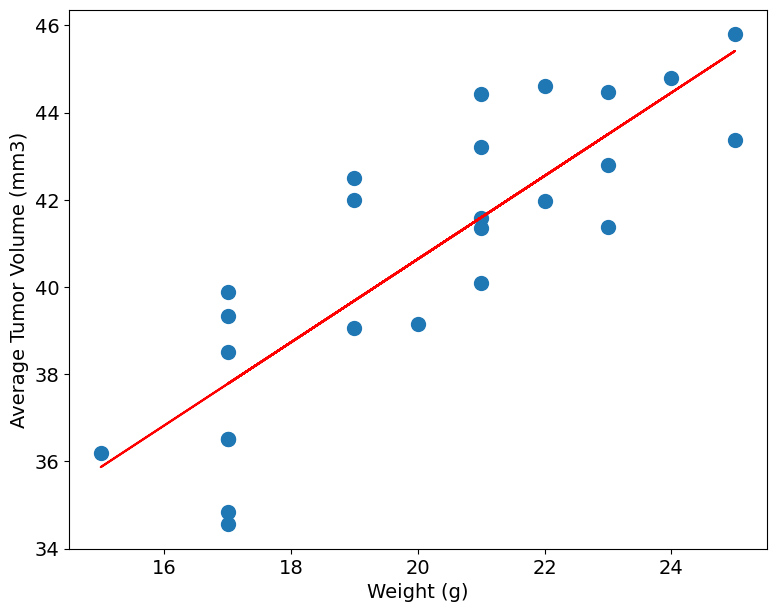

In [36]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_mouse_weight, Capomulin_avg_tum_vol)
regress_values = Capomulin_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.scatter(Capomulin_mouse_weight,Capomulin_avg_tum_vol, s = 100)
plt.xlabel('Weight (g)', fontsize = 14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(Capomulin_mouse_weight,regress_values,"r-")
plt.show()